# 진행목적 
- 웨이퍼의 데이터 셋이 너무 커 한번에 메모리에 올려 처리할 수 없음
- 그래서 하나의 데이터 셋을 여러개의 pkl 파일로 분할
- 그리고 모델링 할 때 한개 씩 pkl을 불러 와 제너레이터 형식으로 모델 학습 진행 
- 이 파일은 pkl파일 분할을 위한 노트북 

#데이터 호출

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 

In [ ]:
!cp '/content/drive/MyDrive/데이터 보관/웨이퍼/LSWMD.pkl.zip' ./
!unzip /content/LSWMD.pkl.zip

Archive:  /content/LSWMD.pkl.zip
  inflating: LSWMD.pkl               


In [ ]:
df = pd.read_pickle('/content/LSWMD.pkl')
df.head()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]]


# 전처리 
- 카테고리 코드 화 
- 이미지 분류를 위해서는 string 형태로 되어 있는 failureType을 int형태로 바꿔주어야 함 

## 카테고리 코드 화 

**Failure Type**

- 0 - center
- 1 - Donut
- 2 - Edge-Loc
- 3 - Edge - Ring
- 4 - Loc
- 5 - Near-full
- 6 - Random
- 7 - Scratch
- 8 - none
- 9 - nan

In [ ]:
df['failureType'] =df['failureType'].astype('string').astype('category').cat.codes

## 컬럼 제거 
- 필요 없는 컬럼 제거

In [ ]:
df = df.drop(columns = ['dieSize','lotName','waferIndex','trianTestLabel'])

In [ ]:
df.head()

,waferMap,failureType
19,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",4
36,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2
37,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2
38,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2
39,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2


## failuretype 8,9 제거 
- failureType 8은 normal, failureType 9 는 type 분류가 안된 경우 
- 불량 이미지 중 불량 type을 판별하기 위해 위 두가지를 제외 함 
- normal 케이스의 경우 데이터 량이 너무 많아 failuretype의 정확도에 착시를 줌 

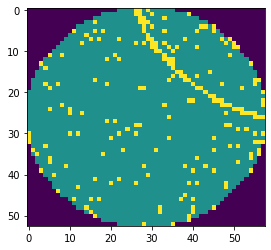

In [ ]:
plt.imshow(df[df['failureType']==7]['waferMap'].iloc[0])

In [ ]:
df = df[df['failureType']!=9]

In [ ]:
df = df[df['failureType']!=8]

## x 리사이즈
- 이미지 별로 사이즈가 달라 이를 통일 함 

In [ ]:
import cv2 

#사이즈 재정의 하는 함수 정의 
def resize(image):
  import cv2
  resized = cv2.resize(image,dsize = (45,45))
  return resized

In [ ]:
#x선언 
resized_image_list = []

#x를 따로 만드는 경우 
for i in np.array(df['waferMap']):
  # resized_image = resize(i)
  # resized_image_list.append(resized_image)
  resized_image_list.append(cv2.resize(i,dsize=(45,45)))
x = np.array(resized_image_list)
# x = raw_x/255.

## y 정의 

In [ ]:
y = df['failureType']

In [ ]:
45*45

2025

# 파일 분할 저장
- 34590개 씩 5세트로 슬라이싱 하기 위해 (34590,45,45)의 형태를 (34590,45*45) 형태의 2차원으로 저장 
- 분할 데이터 셋을 불러올 때 reshape 필요 

## X 이미지 데이터 저장 

In [ ]:
x_for_save = x.reshape(-1,45*45)

In [ ]:
import pickle
with open('df1','wb') as f:
  pickle.dump(temp[0:std],f,pickle.HIGHEST_PROTOCOL)

In [ ]:
import pickle
for i in range(5):
  with open(f'df_x{i}','wb') as f:
    pickle.dump(x_for_save[i*std:(i+1)*std],f,pickle.HIGHEST_PROTOCOL)
  print(i*std,(i+1)*std)

## y 이미지 데이터 저장 

In [ ]:
for i in range(5):
  with open(f'df_y{i}','wb') as f:
    pickle.dump(y[i*std:(i+1)*std],f,pickle.HIGHEST_PROTOCOL)
  print(i*std,(i+1)*std)

0 34590
34590 69180
69180 103770
103770 138360
138360 172950


In [ ]:
for i in range(3):
  !ls -al

total 20
drwxr-xr-x 1 root root 4096 Dec 31 01:49 .
drwxr-xr-x 1 root root 4096 Dec 31 01:46 ..
drwxr-xr-x 4 root root 4096 Dec  3 14:33 .config
drwx------ 5 root root 4096 Dec 31 01:49 drive
drwxr-xr-x 1 root root 4096 Dec  3 14:33 sample_data
total 20
drwxr-xr-x 1 root root 4096 Dec 31 01:49 .
drwxr-xr-x 1 root root 4096 Dec 31 01:46 ..
drwxr-xr-x 4 root root 4096 Dec  3 14:33 .config
drwx------ 5 root root 4096 Dec 31 01:49 drive
drwxr-xr-x 1 root root 4096 Dec  3 14:33 sample_data
total 20
drwxr-xr-x 1 root root 4096 Dec 31 01:49 .
drwxr-xr-x 1 root root 4096 Dec 31 01:46 ..
drwxr-xr-x 4 root root 4096 Dec  3 14:33 .config
drwx------ 5 root root 4096 Dec 31 01:49 drive
drwxr-xr-x 1 root root 4096 Dec  3 14:33 sample_data


In [ ]:
!cp 'df_x0' '/content/drive/MyDrive/데이터 보관/웨이퍼'
!cp 'df_x1' '/content/drive/MyDrive/데이터 보관/웨이퍼'
!cp 'df_x2' '/content/drive/MyDrive/데이터 보관/웨이퍼'
!cp 'df_x3' '/content/drive/MyDrive/데이터 보관/웨이퍼'
!cp 'df_x4' '/content/drive/MyDrive/데이터 보관/웨이퍼'

!cp 'df_y0' '/content/drive/MyDrive/데이터 보관/웨이퍼'
!cp 'df_y1' '/content/drive/MyDrive/데이터 보관/웨이퍼'
!cp 'df_y2' '/content/drive/MyDrive/데이터 보관/웨이퍼'
!cp 'df_y3' '/content/drive/MyDrive/데이터 보관/웨이퍼'
!cp 'df_y4' '/content/drive/MyDrive/데이터 보관/웨이퍼'

# 노 분할 저장 
- failure Type 8 을 제외할 경우 데이터 량이 많지 않아 하나의 파일로 추출할 수 있음 

In [ ]:
x_for_save.shape

(25519, 2025)

In [ ]:
with open(f'df_x_no8','wb') as f:
  pickle.dump(x_for_save,f,pickle.HIGHEST_PROTOCOL)


In [ ]:
with open(f'df_y_no8','wb') as f:
  pickle.dump(y,f,pickle.HIGHEST_PROTOCOL)


In [ ]:
!cp 'df_x_no8' '/content/drive/MyDrive/데이터 보관/웨이퍼'
!cp 'df_y_no8' '/content/drive/MyDrive/데이터 보관/웨이퍼'

In [ ]:
df = pd.read_pickle('/content/drive/MyDrive/데이터 보관/웨이퍼/df_x_no8')

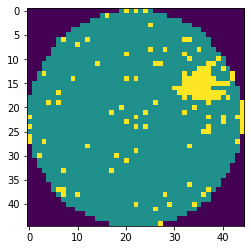

In [ ]:
plt.imshow(df[0].reshape(45,45))